In [16]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from scipy import stats

In [17]:
df = pd.read_csv("stocks_sample.csv")

In [18]:
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,0,2023-09-07,17.139999,17.350000,16.990000,17.290001,17.290001,445000.0,NVDA
1,1,2023-09-08,17.260000,17.379999,16.700001,16.879999,16.879999,353500.0,NVDA
2,2,2023-09-11,17.049999,17.389999,17.030001,17.280001,17.280001,587200.0,NVDA
3,3,2023-09-12,17.129999,17.740000,17.100000,17.570000,17.570000,550600.0,NVDA
4,4,2023-09-13,17.469999,17.540001,16.400000,16.440001,16.440001,652300.0,NVDA


In [19]:
df.shape

(92247, 9)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92247 entries, 0 to 92246
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  92247 non-null  int64  
 1   Date        92247 non-null  object 
 2   Open        91760 non-null  float64
 3   High        91760 non-null  float64
 4   Low         91760 non-null  float64
 5   Close       91760 non-null  float64
 6   Adj Close   91760 non-null  float64
 7   Volume      91760 non-null  float64
 8   Symbol      92247 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 6.3+ MB


In [21]:
df['Symbol'].unique()

array(['NVDA', 'NIO', 'INND', 'TSLA', 'INTC', 'AVGO', 'SOFI', 'PSNYW',
       'PLTR', 'PATH', 'F', 'NU', 'BAC', 'AAPL', 'AMD', 'BCS', 'T',
       'LCID', 'SWN', 'MARA', 'ABEV', 'VALE', 'WBD', 'PBR', 'AMZN', 'X',
       'PFE', 'AAL', 'SIRI', 'RIVN', 'GOOGL', 'GME', 'CCL', 'NOK', 'LUMN',
       'BBD', 'ASTS', 'MU', 'RIG', 'SNAP', 'ERIC', 'CLF', 'WBA', 'OXY',
       'LYG', 'GOOG', 'CDE', 'WFC', 'SRCL', 'NCLH', 'ITUB', 'BTG', 'PCG',
       'PSNY', 'GOLD', 'TSM', 'KVUE', 'UMC', 'HPE', 'MSFT', 'GRAB',
       'MRVL', 'HOOD', 'VZ', 'META', 'FCX', 'U', 'ET', 'IOT', 'BE',
       'CHWY', 'FYBR', 'HBAN', 'CX', 'AGNC', 'MBLY', 'CMG', 'CSCO',
       'PYPL', 'UAA', 'C', 'WMT', 'DELL', 'AFRM', 'MPW', 'UBER', 'SMCI',
       'ALTM', 'CMCSA', 'GM', 'KGC', 'BP', 'CORZ', 'XOM', 'BTE', 'COIN',
       'RKLB', 'ORCL', 'KMI', 'AI', 'BLMZ', 'BENF', 'KNTK', 'BA', 'AMC',
       'GWRE', 'WHLR', 'ALB', 'BRZE', 'MRVI', 'RBLX', 'ASML', 'DOCU',
       'SHOP', 'ELF', 'AUPH', 'VOR', 'SYTA', 'MCD', 'MCRB', 'PL',
       '

In [22]:
df.describe()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume
count,92247.000000,91760.000000,91760.000000,91760.000000,91760.000000,91760.000000,9.176000e+04
mean,46123.000000,1646.017148,1655.826072,1636.242879,1646.328274,1646.086624,7.427795e+07
std,26629.559478,8907.479794,8957.032762,8859.728481,8909.915700,8909.956299,4.808431e+08
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,23061.500000,12.790000,12.980000,12.613750,12.780000,12.550000,1.373872e+05
50%,46123.000000,38.580002,39.189999,38.000000,38.610001,38.279999,1.896650e+06
75%,69184.500000,111.643249,113.221001,110.356096,111.636560,110.853249,1.319592e+07
max,92246.000000,137349.000000,137469.000000,136664.000000,137344.000000,137344.000000,1.193260e+10


In [23]:
df['Open'].mean()

1646.0171479770497

In [24]:
df['Open'].median()

38.580002

In [25]:
df.isnull().sum()

Unnamed: 0      0
Date            0
Open          487
High          487
Low           487
Close         487
Adj Close     487
Volume        487
Symbol          0
dtype: int64

<AxesSubplot:>

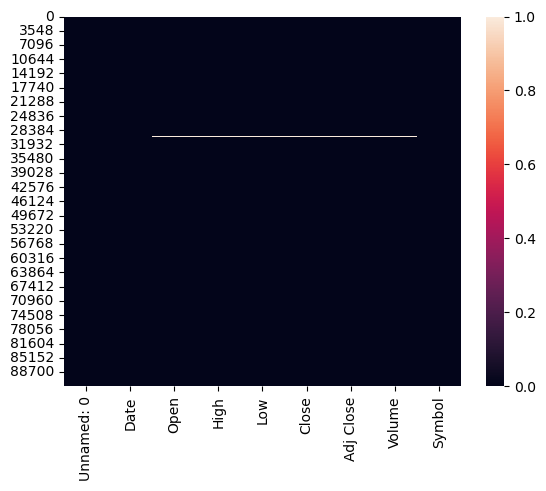

In [26]:
sns.heatmap(df.isna())

In [27]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
col_miss = ['Open','High','Low','Close','Adj Close','Volume']
df[col_miss] = imputer.fit_transform(df[col_miss])

In [28]:
df.isna().sum()

Unnamed: 0    0
Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
Symbol        0
dtype: int64

In [29]:
# Outlier Detection and Treatment.

         Unnamed: 0           Open           High            Low  \
count  92247.000000   92247.000000   92247.000000   92247.000000   
mean   46123.000000    1637.530998    1647.291358    1627.805268   
std    26629.559478    8884.699429    8934.125912    8837.069688   
min        0.000000       0.000000       0.000000       0.000000   
25%    23061.500000      12.884000      13.070000      12.710000   
50%    46123.000000      38.580002      39.189999      38.000000   
75%    69184.500000     110.811500     112.300003     109.610001   
max    92246.000000  137349.000000  137469.000000  136664.000000   

               Close      Adj Close        Volume  
count   92247.000000   92247.000000  9.224700e+04  
mean     1637.840640    1637.598524  7.389583e+07  
std      8887.128954    8887.169526  4.796009e+08  
min         0.000000       0.000000  0.000000e+00  
25%        12.880000      12.630000  1.413815e+05  
50%        38.610001      38.279999  1.896650e+06  
75%       110.800003   

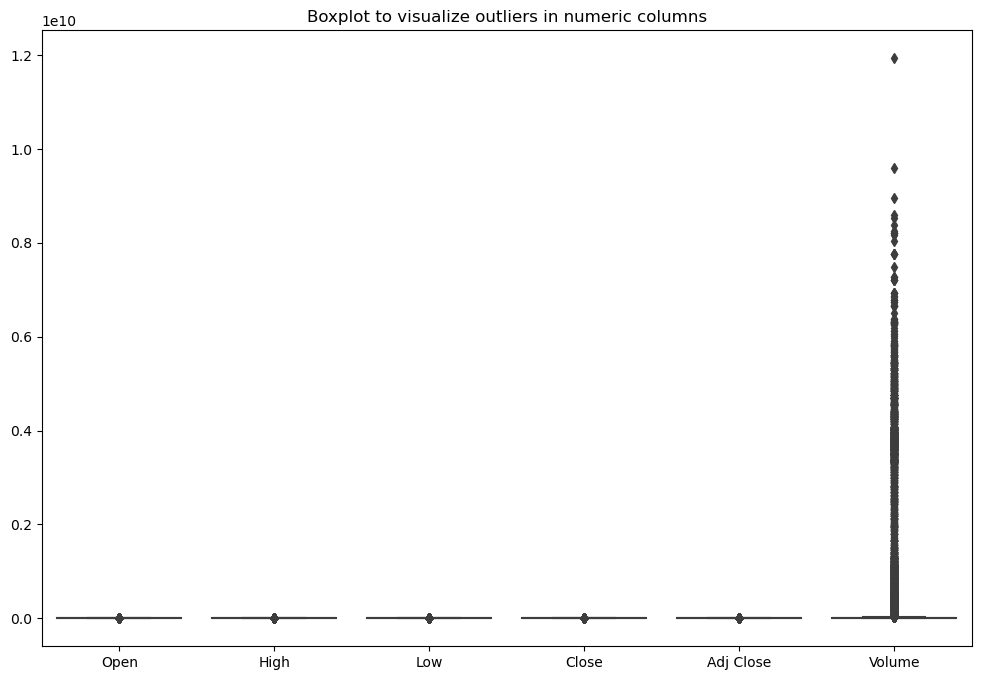

Outliers in 'Open': 14474
Outliers in 'High': 14469
Outliers in 'Low': 14444
Outliers in 'Close': 14458
Outliers in 'Adj Close': 14469
Outliers in 'Volume': 10682
Data shape after removing outliers: (61481, 9)
Data shape after capping/flooring outliers: (92247, 9)


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Summary of the dataset to understand the basic statistics
print(df.describe())

# Visualizing Outliers with Boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])
plt.title('Boxplot to visualize outliers in numeric columns')
plt.show()

# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Detect outliers in each relevant column
outliers_open = detect_outliers_iqr(df, 'Open')
outliers_high = detect_outliers_iqr(df, 'High')
outliers_low = detect_outliers_iqr(df, 'Low')
outliers_close = detect_outliers_iqr(df, 'Close')
outliers_adj_close = detect_outliers_iqr(df, 'Adj Close')
outliers_volume = detect_outliers_iqr(df, 'Volume')

# Print the number of outliers found in each column
print(f"Outliers in 'Open': {len(outliers_open)}")
print(f"Outliers in 'High': {len(outliers_high)}")
print(f"Outliers in 'Low': {len(outliers_low)}")
print(f"Outliers in 'Close': {len(outliers_close)}")
print(f"Outliers in 'Adj Close': {len(outliers_adj_close)}")
print(f"Outliers in 'Volume': {len(outliers_volume)}")

# Handling Outliers: Option 1 - Remove Outliers
# Remove outliers from the dataset (you can adjust this part as needed)
df_no_outliers = df.copy()
for column in ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']:
    Q1 = df_no_outliers[column].quantile(0.25)
    Q3 = df_no_outliers[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df_no_outliers[(df_no_outliers[column] >= lower_bound) & (df_no_outliers[column] <= upper_bound)]

print(f"Data shape after removing outliers: {df_no_outliers.shape}")

# Handling Outliers: Option 2 - Capping/Flooring Outliers
# Cap the outliers at the 5th and 95th percentiles
def cap_outliers(data, column):
    lower_percentile = data[column].quantile(0.05)
    upper_percentile = data[column].quantile(0.95)
    data[column] = np.where(data[column] < lower_percentile, lower_percentile, data[column])
    data[column] = np.where(data[column] > upper_percentile, upper_percentile, data[column])

df_capped = df.copy()
for column in ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']:
    cap_outliers(df_capped, column)

print(f"Data shape after capping/flooring outliers: {df_capped.shape}")

# You can now proceed with the cleaned data (df_no_outliers or df_capped)


In [31]:
df_no_outliers.shape # Data After removing outliers.

(61481, 9)

In [32]:
df_capped.shape # This is the capped data of the above dataset.

(92247, 9)

In [33]:
# Scaling and Normalisation of dataset.

In [34]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Specify the numeric columns you want to transform
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Copying the dataframe for standardization and normalization
df_capped_standardized = df_capped.copy()
df_capped_normalized = df_capped.copy()

# Standardization (mean = 0, standard deviation = 1)
scaler_standard = StandardScaler()
df_capped_standardized[numeric_columns] = scaler_standard.fit_transform(df_capped[numeric_columns])


# Normalization (scaling between 0 and 1)
scaler_minmax = MinMaxScaler()
df_capped_normalized[numeric_columns] = scaler_minmax.fit_transform(df_capped[numeric_columns])



In [35]:
df_capped_standardized.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,0,2023-09-07,-0.339213,-0.339544,-0.338811,-0.339071,-0.338918,-0.545973,NVDA
1,1,2023-09-08,-0.339143,-0.339527,-0.338980,-0.339310,-0.339157,-0.550356,NVDA
2,2,2023-09-11,-0.339266,-0.339521,-0.338787,-0.339077,-0.338924,-0.539162,NVDA
3,3,2023-09-12,-0.339219,-0.339318,-0.338746,-0.338908,-0.338755,-0.540915,NVDA
4,4,2023-09-13,-0.339021,-0.339434,-0.339156,-0.339566,-0.339413,-0.536044,NVDA


In [36]:
df_capped_normalized.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,0,2023-09-07,0.002137,0.002145,0.002137,0.002159,0.002159,0.005445,NVDA
1,1,2023-09-08,0.002153,0.002150,0.002096,0.002103,0.002103,0.004325,NVDA
2,2,2023-09-11,0.002124,0.002151,0.002142,0.002158,0.002158,0.007184,NVDA
3,3,2023-09-12,0.002135,0.002199,0.002152,0.002198,0.002198,0.006737,NVDA
4,4,2023-09-13,0.002182,0.002172,0.002055,0.002042,0.002042,0.007981,NVDA


In [37]:
# Calculate Simple Moving Average (SMA) for 10-day and 50-day periods
df['SMA_10'] = df['Adj Close'].rolling(window=10).mean()
df['SMA_50'] = df['Adj Close'].rolling(window=50).mean()

# Calculate Exponential Moving Average (EMA) for 10-day and 50-day periods
df['EMA_10'] = df['Adj Close'].ewm(span=10, adjust=False).mean()
df['EMA_50'] = df['Adj Close'].ewm(span=50, adjust=False).mean()


In [38]:
import numpy as np

# Bollinger Bands: 20-day SMA and 2 standard deviations
df['SMA_20'] = df['Adj Close'].rolling(window=20).mean()
df['STD_20'] = df['Adj Close'].rolling(window=20).std()
df['Upper_Band'] = df['SMA_20'] + (df['STD_20'] * 2)
df['Lower_Band'] = df['SMA_20'] - (df['STD_20'] * 2)

# Average True Range (ATR)
df['High-Low'] = df['High'] - df['Low']
df['High-Close'] = np.abs(df['High'] - df['Adj Close'].shift(1))
df['Low-Close'] = np.abs(df['Low'] - df['Adj Close'].shift(1))
df['True_Range'] = df[['High-Low', 'High-Close', 'Low-Close']].max(axis=1)
df['ATR'] = df['True_Range'].rolling(window=14).mean()


In [39]:
# Relative Strength Index (RSI)
delta = df['Adj Close'].diff(1)
gain = np.where(delta > 0, delta, 0)
loss = np.where(delta < 0, -delta, 0)
avg_gain = pd.Series(gain).rolling(window=14).mean()
avg_loss = pd.Series(loss).rolling(window=14).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

# Moving Average Convergence Divergence (MACD)
df['EMA_12'] = df['Adj Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Adj Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['EMA_12'] - df['EMA_26']
df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()


In [40]:
# Lag features for Adj Close
df['Adj Close_Lag1'] = df['Adj Close'].shift(1)
df['Adj Close_Lag2'] = df['Adj Close'].shift(2)
df['Adj Close_Lag3'] = df['Adj Close'].shift(3)


In [41]:
# Daily Returns
df['Daily_Return'] = df['Adj Close'].pct_change()

# Example: Price-to-Earnings ratio (if available)
# df['P/E_Ratio'] = df['Price'] / df['Earnings']


In [42]:
# Rolling Mean and Rolling Standard Deviation for 30-day window
df['Rolling_Mean_30'] = df['Adj Close'].rolling(window=30).mean()
df['Rolling_Std_30'] = df['Adj Close'].rolling(window=30).std()


In [43]:
import pandas as pd
import numpy as np



# Lag Features
df['lag1_Close'] = df['Close'].shift(1)
df['lag2_Close'] = df['Close'].shift(2)

# Moving Averages: Short-term (5) and long-term (20)
df['MA_5'] = df['Close'].rolling(window=5).mean()
df['MA_20'] = df['Close'].rolling(window=20).mean()

# Volatility Feature: Rolling standard deviation (volatility)
df['Volatility_5'] = df['Close'].rolling(window=5).std()
df['Volatility_20'] = df['Close'].rolling(window=20).std()

# Momentum Indicators: RSI and MACD
delta = df['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
df['RSI_14'] = 100 - (100 / (1 + rs))

# MACD Calculation (12-period EMA - 26-period EMA)
EMA_12 = df['Close'].ewm(span=12, adjust=False).mean()
EMA_26 = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = EMA_12 - EMA_26

# Time Features: Add hour of the day and day of the week
df['Hour'] = pd.to_datetime(df['Date']).dt.hour
df['DayOfWeek'] = pd.to_datetime(df['Date']).dt.dayofweek

# Log Returns
df['Log_Returns'] = np.log(df['Close'] / df['Close'].shift(1))

# Volume-Weighted Average Price (VWAP)
df['VWAP'] = (df['Close'] * df['Volume']).cumsum() / df['Volume'].cumsum()

# Drop NaN values
df.dropna(inplace=True)

# Display the first few rows to check the features
df.head()


C:\Users\sahoo\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,SMA_10,...,lag2_Close,MA_5,MA_20,Volatility_5,Volatility_20,RSI_14,Hour,DayOfWeek,Log_Returns,VWAP
49,49,2023-11-15,20.950001,20.950001,20.660000,20.790001,20.790001,619300.0,NVDA,20.034,...,20.150000,20.238,19.5250,0.572513,0.627581,73.670220,0,2,-0.003361,18.359205
50,50,2023-11-16,19.610001,19.889999,18.070000,18.459999,18.459999,2622300.0,NVDA,19.893,...,20.860001,20.012,19.4930,0.974306,0.665560,45.634261,0,3,-0.118866,18.365269
51,51,2023-11-17,18.540001,18.959999,18.340000,18.559999,18.559999,7076100.0,NVDA,19.745,...,20.790001,19.764,19.4780,1.178233,0.683710,50.174808,0,4,0.005402,18.392464
52,52,2023-11-20,18.740000,19.400000,18.610001,19.250000,19.250000,4302800.0,NVDA,19.695,...,18.459999,19.584,19.4885,1.173257,0.678220,51.530611,0,0,0.036502,18.459586
53,53,2023-11-21,19.260000,19.350000,18.379999,18.670000,18.670000,3349100.0,NVDA,19.587,...,18.559999,19.146,19.4670,0.968778,0.697719,43.117751,0,1,-0.030593,18.471669
